# House Sales in USA 





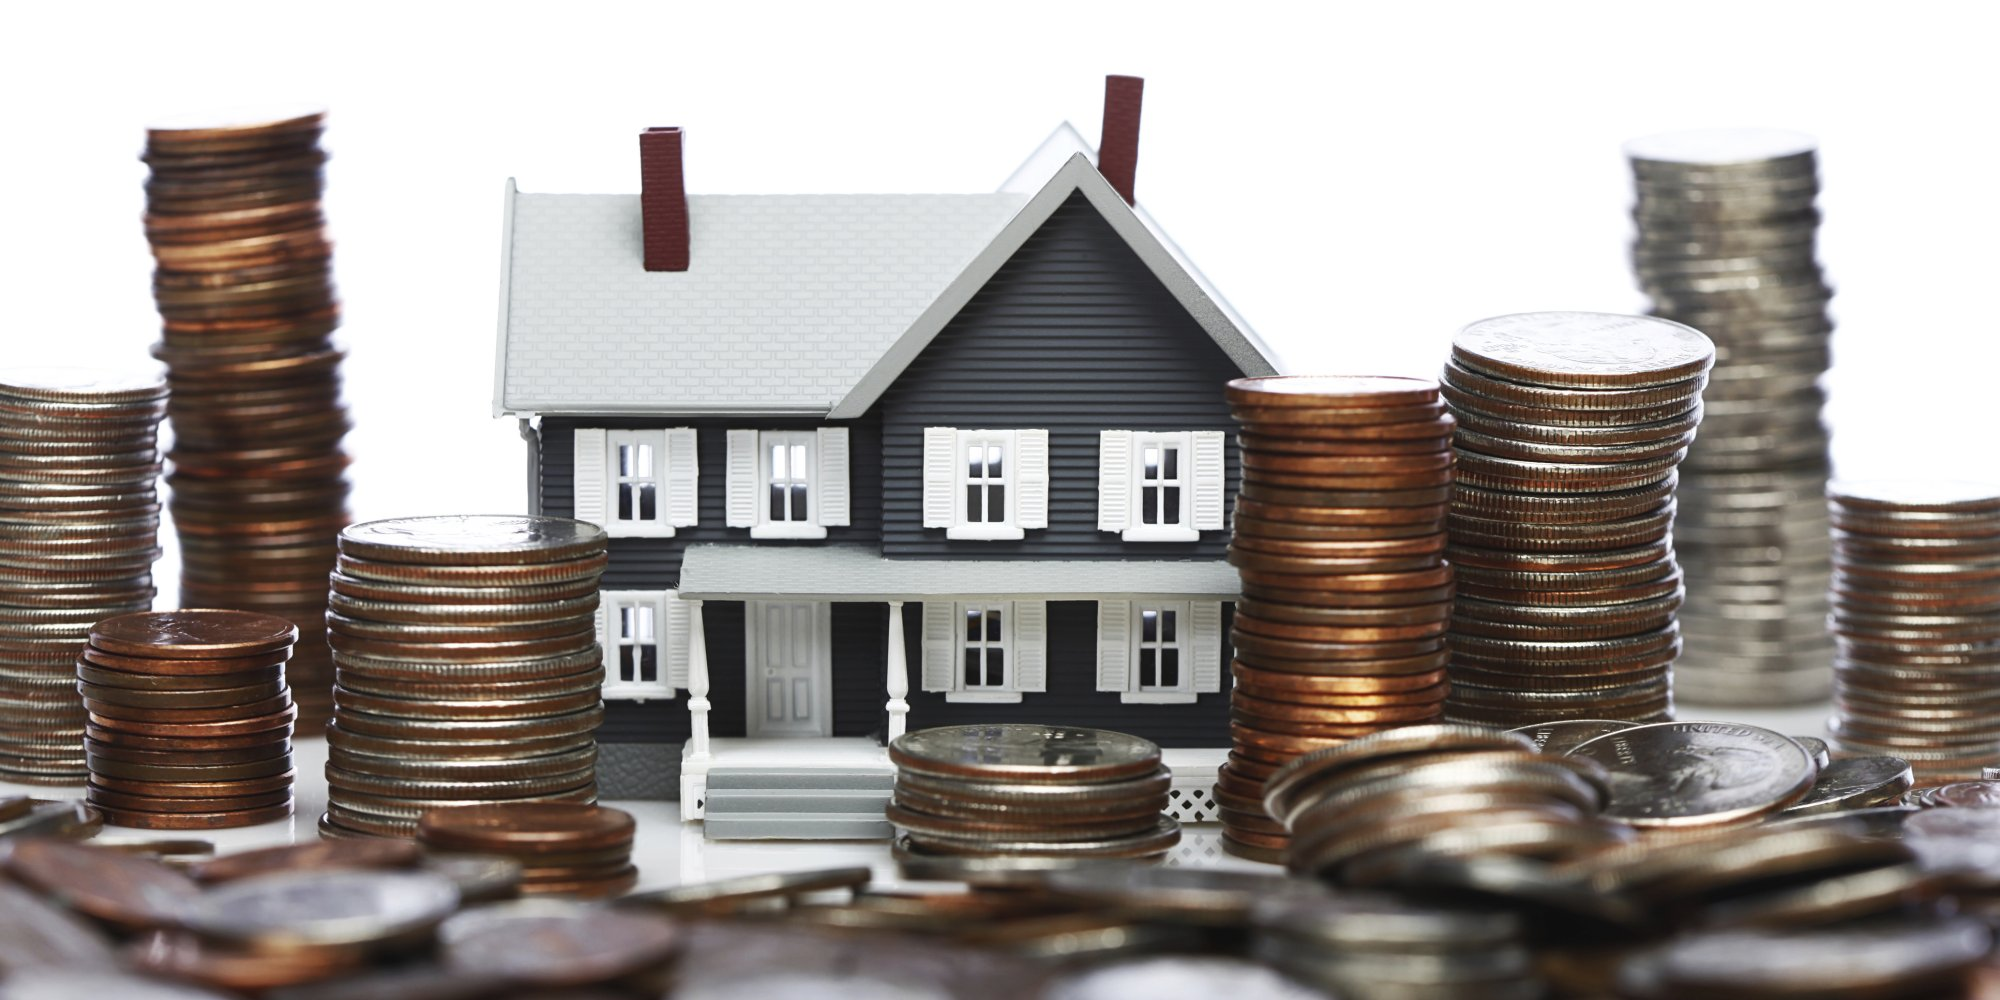

In [0]:
from IPython.display import Image
Image(filename='original.jpg',width=800, height=400)

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D



In [0]:
df=pd.read_csv('content/kc_house_data_NaN.csv')

In [0]:
df.head(5)

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [0]:
df.describe()

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00000,2.161300e+04,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,10806.00000,4.580302e+09,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,6239.28002,2.876566e+09,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,0.00000,1.000102e+06,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,5403.00000,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,10806.00000,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,16209.00000,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,21612.00000,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [0]:
df.dtypes

Unnamed: 0         int64
id                 int64
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [0]:
print("number of NaN values for the column bedrooms :", df['sqft_living'].isnull().sum())
 
 

number of NaN values for the column bedrooms : 0


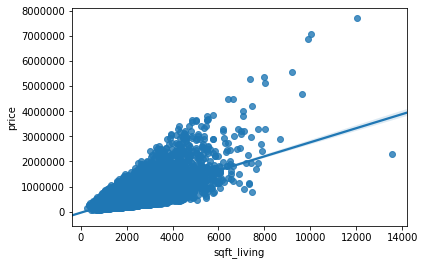

In [0]:
sns.regplot(x='sqft_living', y='price', data=df)


In [0]:
train_data,test_data = train_test_split(df,train_size = 0.8,random_state=3)

lm =  LinearRegression()
X_train = np.array(train_data['sqft_living'], dtype=pd.Series).reshape(-1,1)
y_train = np.array(train_data['price'], dtype=pd.Series)
lm.fit(X_train,y_train)

X_test = np.array(test_data['sqft_living'], dtype=pd.Series).reshape(-1,1)
y_test = np.array(test_data['price'], dtype=pd.Series)

pred = lm.predict(X_test)

In [0]:
lm.score(X_test, y_test)


0.496239362249571

In [0]:
lm.intercept_

-47235.81130290113

In [0]:
lm.coef_

array([282.2468152])

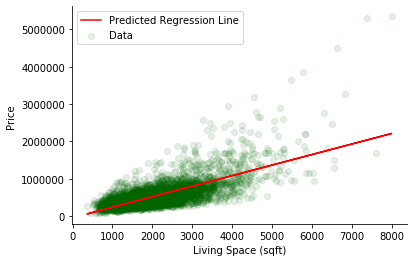

In [0]:

plt.scatter(X_test,y_test,color='darkgreen',label="Data", alpha=.1)
plt.plot(X_test,lm.predict(X_test),color="red",label="Predicted Regression Line")
plt.xlabel("Living Space (sqft)")
plt.ylabel("Price ")
plt.legend()
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

### **Visualizing   Data**



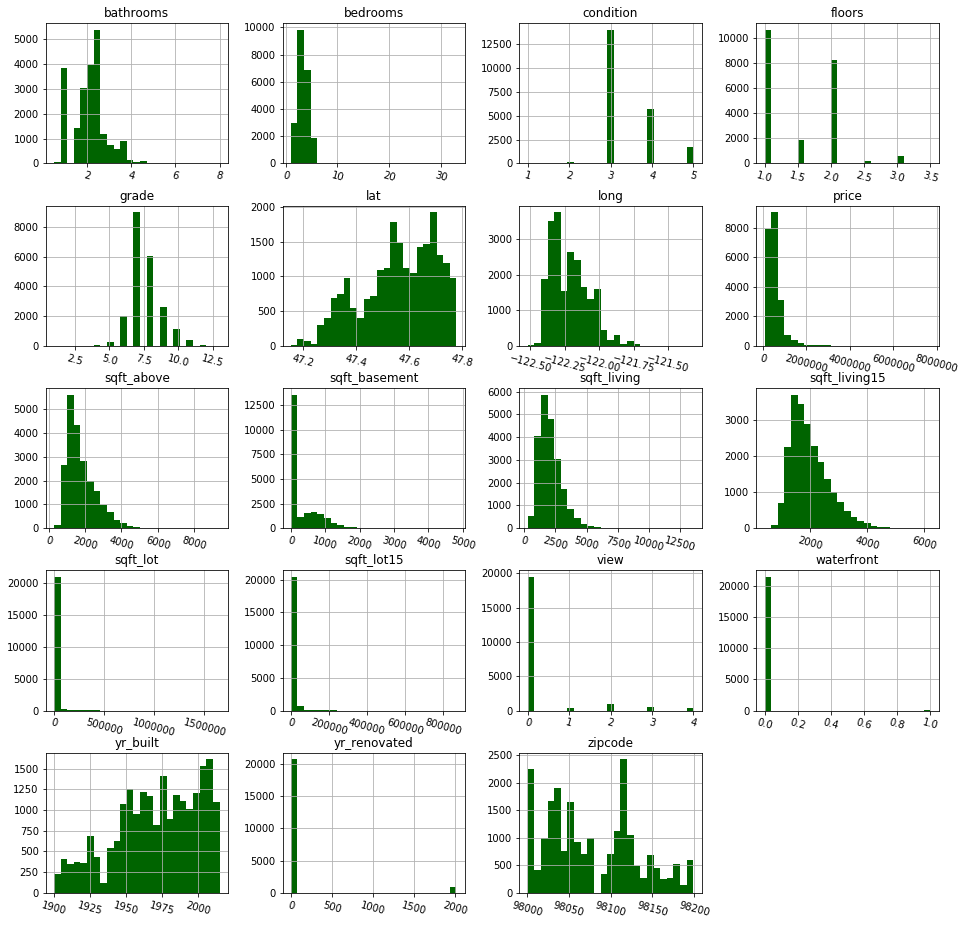

In [0]:
df1=df[['price', 'bedrooms', 'bathrooms', 'sqft_living',
    'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
    'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
    'lat', 'long', 'sqft_living15', 'sqft_lot15']]
h = df1.hist(bins=25,figsize=(16,16),xlabelsize='10',ylabelsize='10',xrot=-15,color='darkgreen')


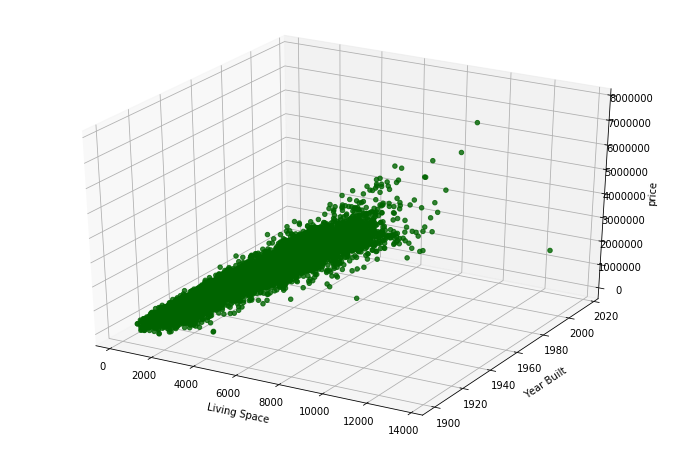

In [0]:
fig=plt.figure(figsize=(12,8))
ax=fig.add_subplot(1,1,1, projection="3d")
ax.scatter(train_data['sqft_living'],train_data['yr_built'],train_data['price'],c="darkgreen",alpha=.8)
ax.set(xlabel='\nLiving Space',ylabel='\nYear Built',zlabel='\nprice');

In [0]:
import folium
from folium.plugins import HeatMap

In [0]:
maxpr=df.loc[df['price'].idxmax()]

# define a function to draw a basemap easily
def generateBaseMap(default_location=[47.5112, -122.257], default_zoom_start=7):
    base_map = folium.Map(location=default_location, control_scale=True, zoom_start=default_zoom_start)
    return base_map

df_copy = df.copy()
df_copy['count'] = 1
basemap = generateBaseMap()
folium.TileLayer('cartodbpositron').add_to(basemap)
s=folium.FeatureGroup(name='icon').add_to(basemap)
folium.Marker([maxpr['lat'], maxpr['long']],popup='Highest Price: $'+str(format(maxpr['price'],'.0f')),
              icon=folium.Icon(color='darkgreen')).add_to(s)
# add heatmap
HeatMap(data=df_copy[['lat','long','count']].groupby(['lat','long']).sum().reset_index().values.tolist(),
        radius=8,max_zoom=13,name='Heat Map').add_to(basemap)
folium.LayerControl(collapsed=False).add_to(basemap)
basemap

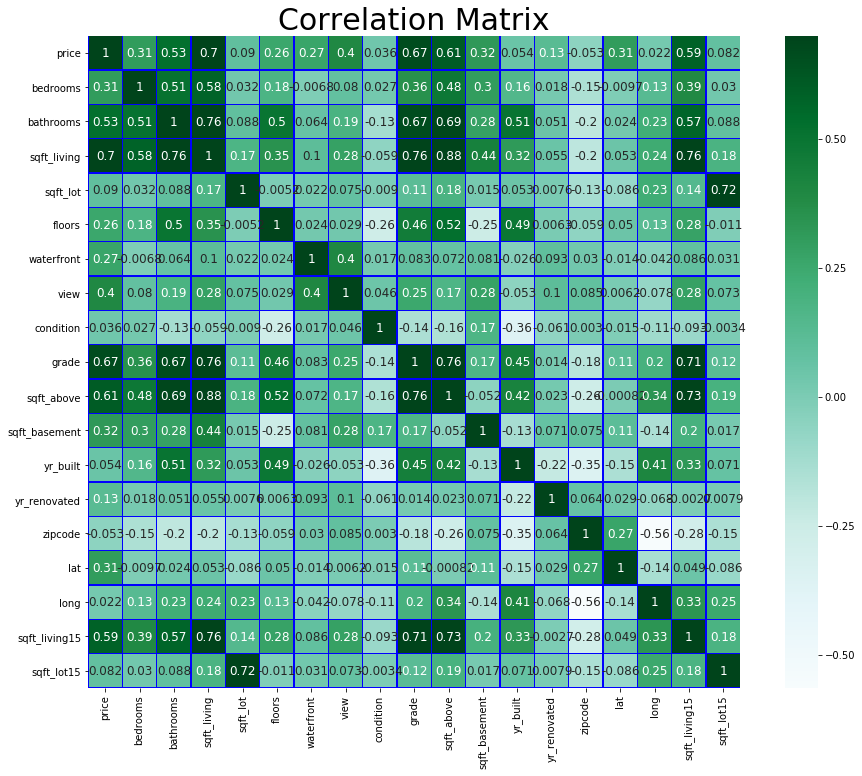

In [0]:
#the relation between the features
features = ['price','bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront',
            'view','condition','grade','sqft_above','sqft_basement','yr_built','yr_renovated',
            'zipcode','lat','long','sqft_living15','sqft_lot15']

mask = np.zeros_like(df[features].corr(), dtype=np.bool) 
 
figure, axe = plt.subplots(figsize=(16, 12))
plt.title('Correlation Matrix',fontsize=30)

sns.heatmap(df[features].corr(),linewidths=0.25,vmax=0.7,square=True,cmap="BuGn",  linecolor='b',annot=True,annot_kws={"size":12});

### **Data Preprocessing**

 


In [0]:
print(  df['bedrooms'].isnull().sum())
print( df['bathrooms'].isnull().sum())
print( df['floors'].isnull().sum())
print(  df['lat'].isnull().sum())
print( df['view'].isnull().sum())
print( df['sqft_living15'].isnull().sum())
print(  df['sqft_above'].isnull().sum())
print( df['grade'].isnull().sum())
 
 

0
0
0
0
0
0
0
0


In [0]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]

### **Model**



1.   **Multiple Regression**



In [0]:
X = df[features ]
Y = df['price']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=1)
model_1 = LinearRegression()
Z=model_1.fit(x_train, y_train)
print('Accuracy: {}'.format(model_1.score(x_test, y_test)))
print('Intercept: {}'.format(model_1.intercept_))
print('Coefficients: {}'.format(model_1.coef_))
pred = model_1.predict(x_test)
 


Accuracy: 0.6477588602493091
Intercept: -32598500.765445538
Coefficients: [-2.72745769e+04  5.64681509e+05  6.77569683e+05 -2.64361402e+04
  2.33928353e+15  6.94370854e+04 -2.03431145e+03 -2.75166215e+00
  2.33928353e+15  8.09117422e+04 -2.33928353e+15]


In [0]:
from sklearn import metrics
RSME= float(format(np.sqrt(metrics.mean_squared_error(y_test,pred)),'.3f'))
print('Root Mean Squared Error (RMSE): {}'.format(RSME))


Root Mean Squared Error (RMSE): 227433.025




2.   **Ridge Regression**



In [0]:
from sklearn.linear_model import Ridge

RidgeModel = Ridge(alpha = 0.1)
RidgeModel.fit(x_train, y_train)
RidgeModel.score(x_test, y_test)

0.6478759163939117

In [0]:
pred1 = RidgeModel.predict(x_test)
RSME2= float(format(np.sqrt(metrics.mean_squared_error(y_test,pred1)),'.3f'))
print('Root Mean Squared Error (RMSE): {}'.format(RSME2))


Root Mean Squared Error (RMSE): 227395.232




3. **Polynomial Regression**



In [0]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
pr = PolynomialFeatures(degree=2)
x_train_pr = pr.fit_transform(x_train)
x_test_pr = pr.fit_transform(x_test)
poly = Ridge(alpha=0.1)
poly.fit(x_train_pr, y_train)
poly.score(x_test_pr, y_test)

0.7002744277220405

In [0]:
pred2 = poly.predict(x_test_pr)
RSME3= float(format(np.sqrt(metrics.mean_squared_error(y_test,pred2)),'.3f'))
print('Root Mean Squared Error (RMSE): {}'.format(RSME3))

Root Mean Squared Error (RMSE): 209795.123


In [0]:
print("Yassine Zayani")

Yassine Zayani
